In [1]:
import numpy as np 
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve
import scipy.optimize as op
from mpl_toolkits.mplot3d import axes3d
from scipy.io import loadmat
import librosa
import plotly.graph_objects as go
from IPython.display import Audio
import plotly.express 
from audio2numpy import open_audio
from librosa import display
%matplotlib notebook

$PROBLEM$ $1$

$Part$ $A$

The Original Sawtooh Function


<IPython.core.display.Javascript object>


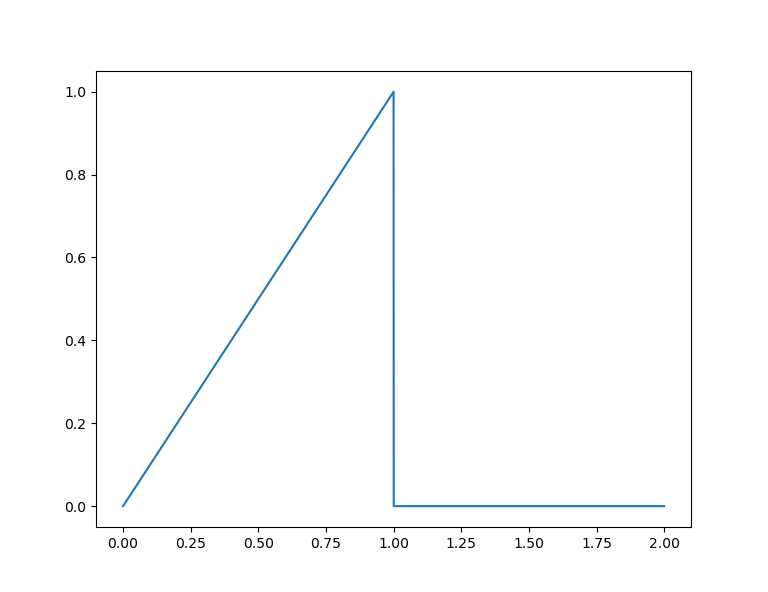

In [6]:
#plotting the sawtooth function for x between 0 and 2
resolution = 0.0001
x = np.arange(0,2,resolution)
square = np.zeros_like(x)
squarefft = np.zeros_like(x)
square[:int(x.size/2)] = x[:10000]
square[int(x.size/2):]= 0
print("The Original Sawtooh Function")
plt.figure()
plt.plot(x,square)
plt.show()

$Part$ $B$

<IPython.core.display.Javascript object>


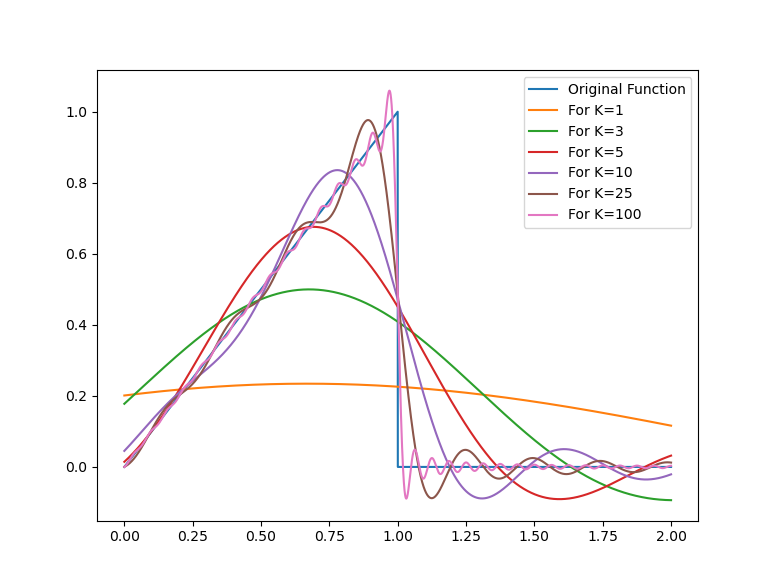

In [5]:
#approximating the sawtooth function with fourier series.
#for k=1,3,5,10,25,100 all plotted under one graph with different colors
resolution = 0.0001
x = np.arange(0,2,resolution)
square = np.zeros_like(x)
squarefft = np.zeros_like(x)
square[:int(x.size/2)] = x[:10000]
square[int(x.size/2):]= 0
plt.figure()
plt.plot(x,square,label='Original Function')
a0=np.trapz(square,x)/np.pi/2
squarefft=squarefft+a0
n=100
for i in range(n):
    i=i+1
    a=np.trapz(square*np.sin(i*x),x)/np.pi
    b=np.trapz(square*np.cos(i*x),x)/np.pi
    squarefft=squarefft+a*np.sin(i*x)+b*np.cos(i*x)
    if i==1: plt.plot(x,squarefft,label='For K=1')
    if i==3: plt.plot(x,squarefft, label='For K=3')
    if i==5: plt.plot(x,squarefft, label='For K=5')
    if i==10: plt.plot(x,squarefft, label='For K=10')
    if i==25: plt.plot(x,squarefft, label='For K=25')
    if i==100: plt.plot(x,squarefft, label='For K=100')
#we can see that for K=100 light pink approximates better than all for the function
plt.legend()
plt.show()

$PROBLEM$ $2$

$Part$ $A$

Sample Freq = 2000 , N = 1000 , dt= 0.0005
Frequency is 10.0 Hz


<IPython.core.display.Javascript object>


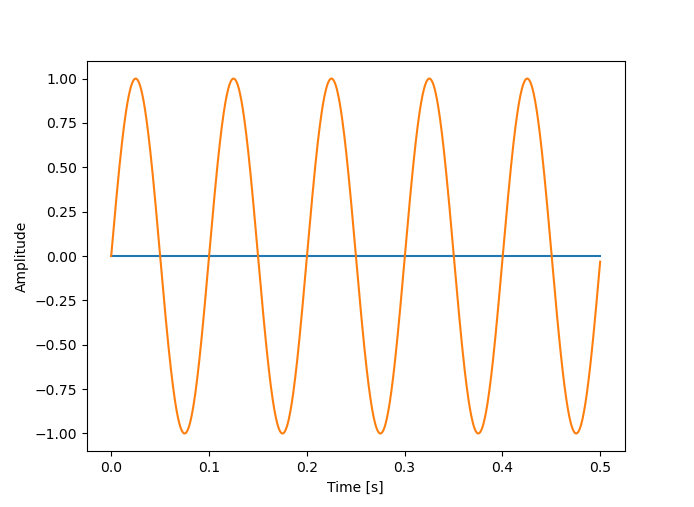

In [10]:
from scipy.io import loadmat
data = loadmat('dataF.mat')
s=data['s'].reshape((-1,1))
N=len(s)
dt=1/Fs
T=N*dt
print("Sample Freq =",Fs,", N =",len(s),", dt=",dt)
t=np.linspace(0,T,N)
#from graph we can clearly see from graph the Period (T) is 0.1 seconds
#frequency is 1/T
Freq=1/0.1
print("Frequency is",Freq,"Hz")
plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t,t*0,t,s)
plt.show()


$Part$ $B$

In [11]:
#the first 7 frequencies in the fourie series
for k in range(7):
    print("f",k,"=",(Fs*k)/N,"Hz",sep='')

f0=0.0Hz
f1=2.0Hz
f2=4.0Hz
f3=6.0Hz
f4=8.0Hz
f5=10.0Hz
f6=12.0Hz


$Part$ $C$

In [50]:
#calculating Coefficients by formula
i=1j
t=np.linspace(0,dt,N)
fre=np.array([0,2,4,6,8,10,12]).reshape((-1,1))
exp=np.zeros(7,dtype=np.complex_)
c=np.zeros(7,dtype=np.complex_)
for m in range(7):
    exp[m]=np.exp(-i*2*np.pi*fre[m]*t[m])

for m in range(7):
    c[m]=np.sum(s[:,0]*exp[m])
    
for  m in range (7):
     print("c",m,"=",c[m],sep='')

c0=(-2.1316282072803006e-14+0j)
c1=(-2.842170943040401e-14+3.2526065174565133e-19j)
c2=(-4.973799150320701e-14+1.3010426069826053e-18j)
c3=(-4.263256414560601e-14+2.6020852139652106e-18j)
c4=(-2.842170943040401e-14+1.734723475976807e-18j)
c5=(-6.394884621840902e-14+8.673617379884035e-18j)
c6=(-4.973799150320701e-14+8.673617379884035e-18j)


$Part$ $D$

In [36]:
#power Energy is
for k in range(7):
    print("P",k,"=",np.absolute(C[k])**2/N,sep='')

P0=2.3322139296651962e-36
P1=5.553167363672771e-37
P2=1.3150716592339733e-35
P3=1.6461430351997995e-35
P4=1.6932868921805134e-36
P5=0.00025
P6=6.348605483009806e-36


$Part$ $E$

In [41]:
#the frequencey with max energy is f5 with P5=.00025, we can also confirm this in part g graph
print("The frequency with max enegy is f5=10Hz")

The frequency with max enegy is f5=10Hz


$Part$ $F$

In [34]:
C=(np.fft.fft(s[:,0]))/N
for k in range(7):
    print("C",k,"=",C[k],sep='')

C0=(-4.829300083516447e-17+0j)
C1=(9.435194973283991e-18+2.1593837828959295e-17j)
C2=(-8.379431550806593e-17+7.82893944342044e-17j)
C3=(-1.0741577836851374e-16-7.01660951563099e-17j)
C4=(3.174901277019806e-17-2.6177988469290647e-17j)
C5=(-1.511585655387449e-16-0.5j)
C6=(5.6787477842867814e-18-7.947551388076873e-17j)


$Part$ $G$

The peak which has most presence is about 10Hz from graph


<IPython.core.display.Javascript object>


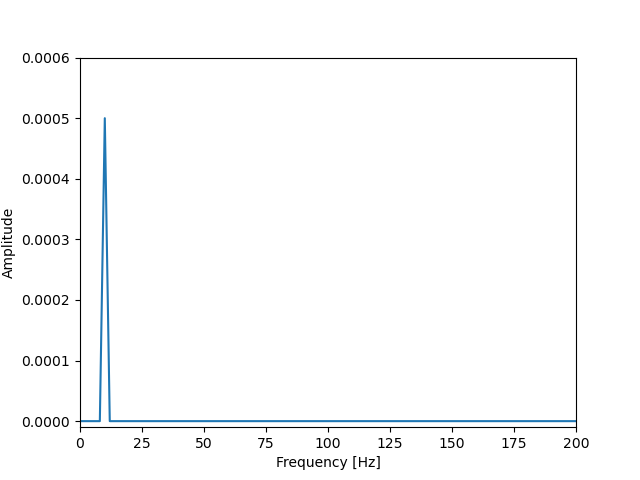

In [42]:
dt=1/2000
n=1000
C=np.fft.fft(s[:,0])/n
freq=np.linspace(0,1/dt,n)
freq=np.arange(0,1000,2).reshape((-1,1))
#the the peak at the right value about 10HZ
print("The peak which has most presence is about 10Hz from graph")
plt.figure()
plt.ylim(-0.00001,0.0006) #to take a closer look at the graph
plt.xlim(0, 200) #to take a closer look at the graph
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(freq[:n//2],np.abs(C)[:n//2]*1/n)
plt.show()

$PROBLEM$ $3$

$Part$ $A$

<IPython.core.display.Javascript object>


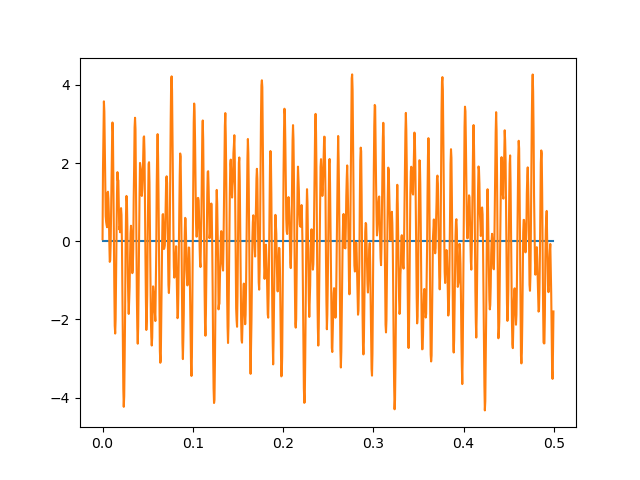

In [31]:
sr=data['sr'].reshape((-1,1))
s=data['s'].reshape((-1,1))
# print("1000 samples were taken with Fs of 2000, thus time was 0.5 sec")
t=np.arange(0,0.5,0.0005).reshape((-1,1))
Fs=2000
plt.figure()
plt.plot(t,t*0,t,sr)
plt.show()

$Part$ $B$

<IPython.core.display.Javascript object>


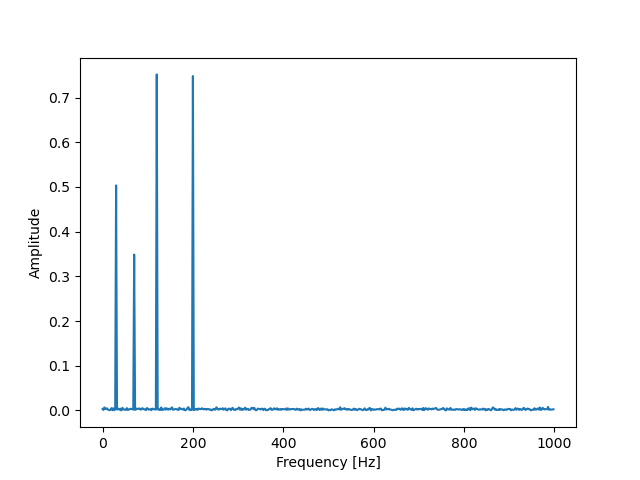

In [41]:
f = np.fft.fft(sr[:,0])
N=1000
plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(freq[:N//2],np.abs(f)[:N//2]*1/N)
plt.show()

$Part$ $C$

In [51]:
print("From graph we can estimate the 4 peaks\n ")
# F1=25Hz
# F2=65Hz
# F3=120Hz
# F4=200Hz
print("F1=25Hz");print("F2=65Hz");print("F3=120Hz");print("F4=200Hz")

From graph we can estimate the 4 peaks
 
F1=25Hz
F2=65Hz
F3=120Hz
F4=200Hz


$PROBLEM$ $4$

$Part$ $A$

Samplerate = 44100 , N = 49253


<IPython.core.display.Javascript object>


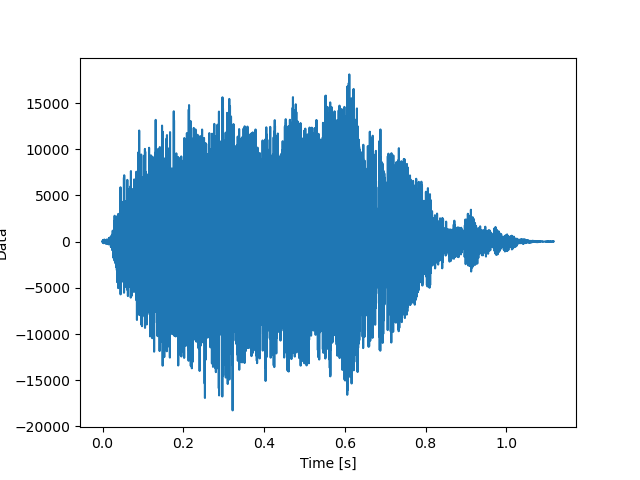

In [156]:
from scipy.io import wavfile
samplerate, data = wavfile.read('wilhelm.wav')
s=data[:,0]
# Fs=44100 #given sampling frequency
print("Samplerate =",samplerate,", N =",len(data))
N=len(data)
T=len(data)/samplerate
t=np.linspace(0,T,N)
plt.figure()
plt.ylabel("Data")
plt.xlabel("Time [s]")
plt.plot(t,s)

$Part$ $B$

<IPython.core.display.Javascript object>


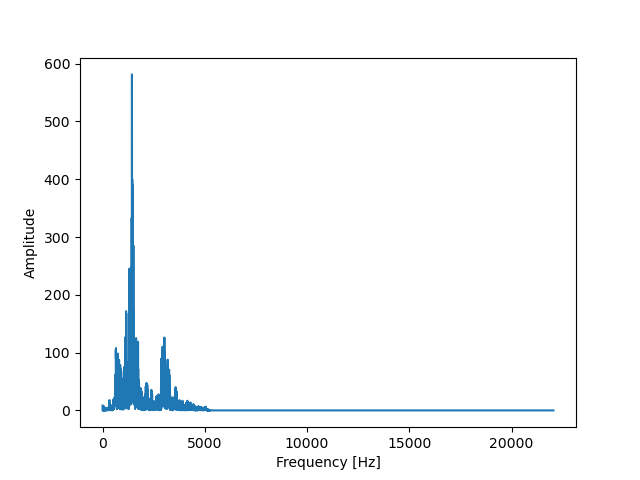

From graph the prominent frewuencies are about F1=1400Hz and F2=3000Hz


In [159]:
freq = np.linspace(0, samplerate, N)
f = np.fft.fft(s)
plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
print("From graph the prominent frewuencies are about F1=1400Hz and F2=3000Hz")
plt.plot(freq[:N//2],np.abs(f)[:N//2]*1/N)
plt.show()